In [127]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense

In [128]:
#!wget https://raw.githubusercontent.com/JasonMorris1/CSE151_Tesla_Stock_Prediction/main/tsla_2014_2023.csv
df = pd.read_csv('tsla_2014_2023.csv')
df['date']=pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df.drop(columns=['open', 'high', 'low', 'close']) # not sure why we do this
df.head()




,date,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,year
0,2014-01-02,92826000,55.3441,54.4401,-37.3736,15.2134,9.6821,9.8202,10.4942,9.6743,0.1695,9.7408,0.3953,0.4026,0.4475,9.9707,2014
1,2014-01-03,70425000,53.7426,53.8215,-81.3045,17.4811,9.6528,9.8261,10.4957,9.6802,0.1626,9.7762,0.2393,0.3793,0.4327,9.8000,2014
2,2014-01-06,80416500,46.3282,50.8704,-123.4275,-37.8247,9.6295,9.8250,10.4967,9.6826,0.1418,9.7979,0.3440,0.3743,0.4263,9.9573,2014
3,2014-01-07,75511500,53.2630,53.4068,-84.7847,-20.7794,9.5977,9.8302,10.5034,9.6881,0.1364,9.8379,0.3433,0.3698,0.4204,10.0853,2014
4,2014-01-08,92448000,58.3687,55.4230,60.7997,43.5706,9.5732,9.8402,10.5111,9.6960,0.1408,9.8702,0.3293,0.3641,0.4139,9.8353,2014


In [129]:
# df_train=df[(df.year<2023) & (df.year>2017)]
# df_test=df[df.year==2023]

df_train=df[(df.year<2022)]
df_test=df[(df.year >=2022)]

X_train=df_train.drop(['date','year','next_day_close'],axis=1)
X_test=df_test.drop(['date','year','next_day_close'],axis=1)
##
y_train=df_train['next_day_close']
y_test=df_test['next_day_close']

X_train_date = df_train['date']
X_test_date = df_test['date']

In [130]:
X_train.columns

Index(['volume', 'rsi_7', 'rsi_14', 'cci_7', 'cci_14', 'sma_50', 'ema_50',
       'sma_100', 'ema_100', 'macd', 'bollinger', 'TrueRange', 'atr_7',
       'atr_14'],
      dtype='object')

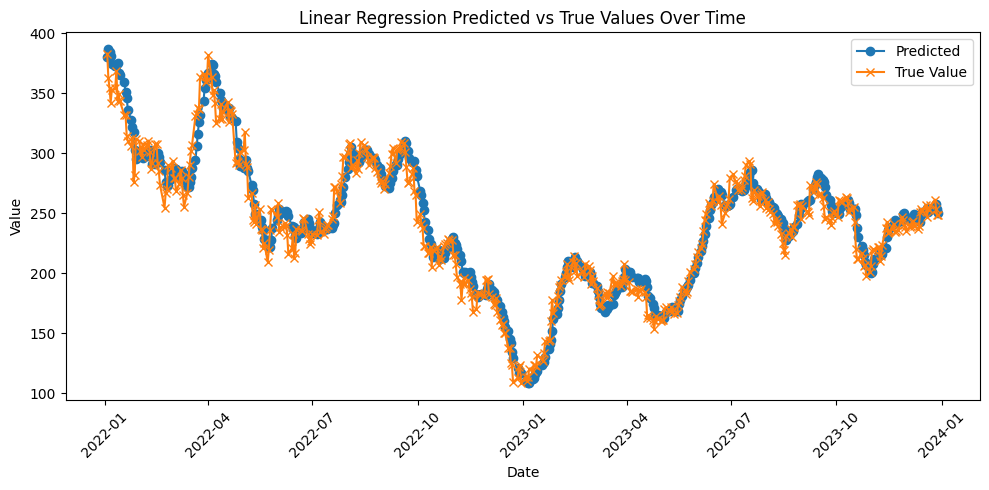

         true  predicted
2015 383.1967   380.0747
2016 362.7067   386.9839
2017 354.9000   384.3005
2018 342.3200   380.9385
2019 352.7067   374.4569
...       ...        ...
2511 256.6100   252.6043
2512 261.4400   254.6499
2513 253.1800   257.7721
2514 248.4800   253.8085
2515 248.4200   250.0790

[501 rows x 2 columns]
mse: 158.58
mae: 9.86


In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

# X_train_scaled.shape, X_test_scaled.shape


# print(X_train_scaled)
# print(y_train)
from sklearn.metrics import classification_report

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)


plt.figure(figsize=(10, 5))  # Set the figure size

plt.plot(X_test_date, y_pred, label='Predicted', marker='o')  # Plot predicted values

#plt.plot(X_test_date, y_test, label='True Value', marker='x')  # Plot true values
#x3,y3 = zip(*sorted(zip(X_test_date, y_test),key=lambda x: x[0]))
plt.plot(X_test_date, y_test, label='True Value', marker='x')  # Plot true values


# Adding titles and labels
plt.title('Linear Regression Predicted vs True Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Adding a legend
plt.legend()

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

#print(y_pred.shape)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

df_result = pd.DataFrame()
df_result['true']= y_test
df_result['predicted']= y_pred

print(df_result)
print(f"mse: {mse:.2f}")
print(f"mae: {mae:.2f}")


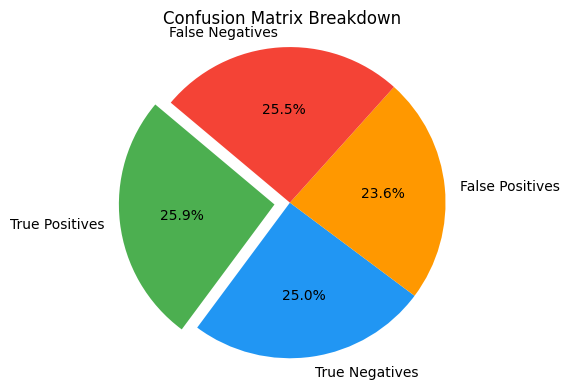

      true  predicted
2015     0          0
2016     0          1
2017     0          0
2018     0          0
2019     1          0
...    ...        ...
2511     1          0
2512     1          1
2513     0          1
2514     0          0
2515     0          0

[501 rows x 2 columns]
Accuracy: 0.51
Recall: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.51      0.50       243
           1       0.52      0.50      0.51       258

    accuracy                           0.51       501
   macro avg       0.51      0.51      0.51       501
weighted avg       0.51      0.51      0.51       501



In [132]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score
# Transform y_train and y_test to binary: 1 for increase, 0 for no change or decrease
y_pred_binary = (df_result['predicted'].diff().fillna(0) > 0).astype(int)
y_test_binary = (df_result['true'].diff().fillna(0) > 0).astype(int)


#Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
tn, fp, fn, tp = cm.ravel()

labels = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
sizes = [tp, tn, fp, fn]
colors = ['#4CAF50', '#2196F3', '#FF9800', '#F44336']
explode = (0.1, 0, 0, 0)  # explode the first slice (True Positives)

plt.figure(figsize=(5, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Confusion Matrix Breakdown')
plt.axis('equal')

# Rotating date labels for better readability
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

accuracy = accuracy_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)


report = classification_report(y_test_binary, y_pred_binary)

df_result = pd.DataFrame({'true': y_test_binary, 'predicted': y_pred_binary})

print(df_result)
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print("Classification Report:\n", report)

In [134]:
df_coefs = pd.DataFrame(linreg.coef_, X_train.columns)
pd.options.display.float_format = '{:.4f}'.format

print(df_coefs)





                0
volume     0.0000
rsi_7      0.0798
rsi_14    -0.0404
cci_7      0.0148
cci_14    -0.0067
sma_50     1.0392
ema_50    -0.0899
sma_100   -0.0642
ema_100    0.0848
macd       3.2273
bollinger  0.0567
TrueRange -0.0890
atr_7      0.2895
atr_14    -0.5554
